# Economics Problem Set 4

Credits: For this problem set, I received helps in terms of classmates pointing me to functions and packages that made the tasks much easier.

### 1. Health claim amounts and the GB family of distributions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
claims = pd.read_csv('clms.txt',squeeze=True, header=None)

In [3]:
claims

0          361.65
1          123.04
2          541.77
3          862.90
4           55.60
5         3728.56
6           70.00
7          730.63
8          420.56
9           81.63
10         226.01
11        1146.88
12          84.43
13          86.83
14         298.60
15         176.27
16          17.19
17         190.33
18         101.54
19        3476.48
20        2162.74
21         183.83
22          50.00
23         152.83
24         198.65
25          47.49
26          50.00
27         586.59
28         114.97
29         161.99
           ...   
10589      191.24
10590       12.74
10591      137.44
10592      163.52
10593      112.40
10594       29.04
10595       62.30
10596      859.43
10597      833.54
10598        8.00
10599      265.63
10600      298.59
10601       29.16
10602    14955.87
10603    12483.61
10604      679.28
10605     1016.47
10606      130.36
10607      187.91
10608      164.53
10609     1506.16
10610      154.37
10611      158.79
10612       55.99
10613     

### (a)

In [4]:
claims.describe()

count     10619.000000
mean        720.277975
std        3972.850824
min           0.010000
25%          74.450000
50%         172.210000
75%         451.535000
max      227967.250000
Name: 0, dtype: float64

In [5]:
claims.median()

172.21

In [6]:
claims.shape

(10619,)

<IPython.core.display.Javascript object>


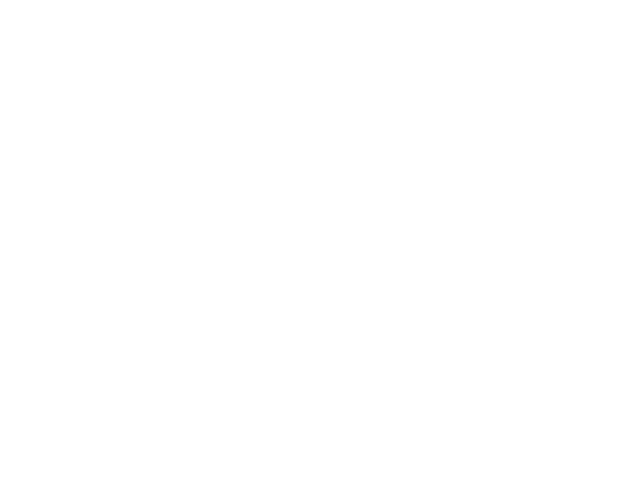

In [7]:
%matplotlib notebook

n = claims.shape[0]
weights = (1 / n) * np.ones((n,))
plt.hist(claims, 1000, weights=weights, 
         edgecolor='black')
plt.title('Health Claims')
plt.xlabel('Claim amount')
plt.ylabel('Percent of total')
plt.xlim(0, 230000)  
plt.show()

Well, that is certainly not informative.

In [8]:
smallclaims = claims[claims<=800]
print(smallclaims.shape)
smallclaims

(9020,)


0        361.65
1        123.04
2        541.77
4         55.60
6         70.00
7        730.63
8        420.56
9         81.63
10       226.01
12        84.43
13        86.83
14       298.60
15       176.27
16        17.19
17       190.33
18       101.54
21       183.83
22        50.00
23       152.83
24       198.65
25        47.49
26        50.00
27       586.59
28       114.97
29       161.99
30       576.18
31       754.00
33       171.75
34       107.68
35       112.77
          ...  
10582    485.64
10583    783.62
10584     23.03
10585    130.17
10586    791.04
10587     58.00
10588    391.39
10589    191.24
10590     12.74
10591    137.44
10592    163.52
10593    112.40
10594     29.04
10595     62.30
10598      8.00
10599    265.63
10600    298.59
10601     29.16
10604    679.28
10606    130.36
10607    187.91
10608    164.53
10610    154.37
10611    158.79
10612     55.99
10613     88.41
10615    269.00
10616     97.43
10617    186.88
10618    119.19
Name: 0, dtype: float64

<IPython.core.display.Javascript object>


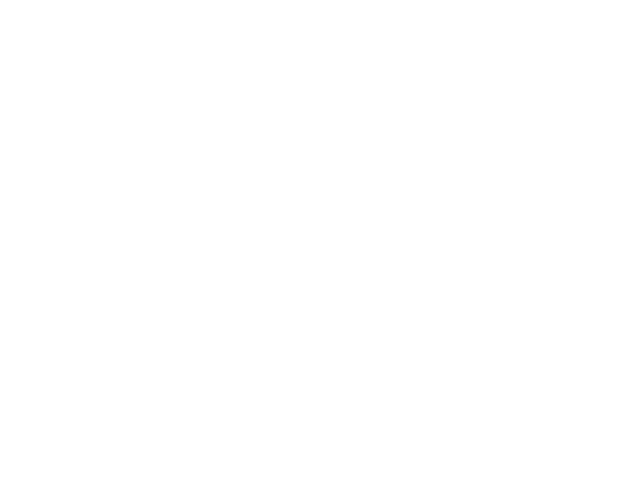

In [9]:
%matplotlib notebook
m = claims.shape[0]
n = smallclaims.shape[0]
weights = (1 / m) * np.ones((n,))
plt.hist(smallclaims, 100, weights=weights, 
         edgecolor='black',normed = True)
plt.title('Small Health Claims')
plt.xlabel('Claim amount')
plt.ylabel('Percent of total')
plt.xlim(0, 800)  
plt.show()

Since the bulk of the claims are smaller than 800 dollars, we can get a much better look of how the data is distributed by zooming in.

### (b)

The pdf of the gamma distribution is the following.

$$ \text{(GA):}\quad f(x;\alpha,\beta) = \frac{1}{\beta^\alpha \Gamma(\alpha)}x^{\alpha-1}e^{-\frac{x}{\beta}},\quad x\in[0,\infty), \:\alpha,\beta>0 $$
$$ \text{where}\quad \Gamma(z)\equiv\int_0^\infty t^{z-1}e^{-t}dt $$

The gamma function $\Gamma(\cdot)$ within the gamma (GA) distribution is a common function that has a preprogrammed function in most programming languages.

In [10]:
# Initial guess:

beta_0 = (claims.std()**2) /claims.mean()
alpha_0 = claims.mean()/beta_0
alpha_0, beta_0

(0.032869701035793335, 21913.12828014157)

We proceed as in the notebook:

In [11]:


# pdf of the GA distribution (model)
import math

def GA_pdf(xvals, alpha, beta):
    pdf_vals = 1/((beta ** alpha) * math.gamma(alpha)) * \
    (xvals ** (alpha - 1)) * np.exp((- xvals)/beta)
    return pdf_vals

# Define log likelihood function for the GA distribution
def log_lik_GA(xvals, alpha, beta):
  
    pdf_vals = GA_pdf(xvals, alpha, beta)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

print('Log-likelihood 1: ', log_lik_GA(claims, alpha_0, beta_0))



Log-likelihood 1:  -93556.2543421564


In [12]:
def crit(params, args):
    alpha, beta = params
    xvals = args
    log_lik_val = log_lik_GA(xvals, alpha, beta)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

In [21]:
# Estimation
import scipy.optimize as opt

params_init = np.array([alpha_0, beta_0]) 

results = opt.minimize(crit, params_init,
                       args = claims, method ='L-BFGS-B',
                       bounds= ((0, None), (0, None)))
alpha_GA, beta_GA = results.x
print(results)

      fun: 82076.64049652668
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.02764864,  0.09313226])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 33
      nit: 8
   status: 0
  success: True
        x: array([  2.21751058e-01,   2.19131283e+04])


Note that the standard deviation is not far from the guess, which may be cause for suspicion if the graph does not inspire confidence.

<IPython.core.display.Javascript object>


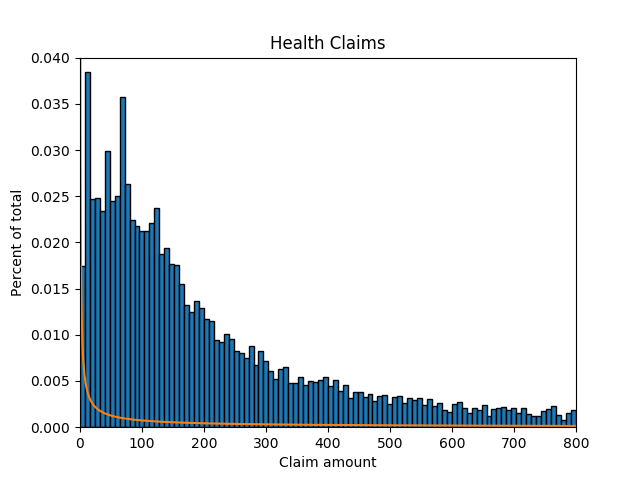

In [22]:
%matplotlib notebook
m = claims.shape[0]
n = smallclaims.shape[0]
weights = (1 / m) * np.ones((n,))
plt.hist(smallclaims, 100, weights=weights, 
         edgecolor='black')

grid = np.linspace(0.001, 800, 1000)
plt.plot(grid, GA_pdf(grid, results.x[0], results.x[1]))

plt.title('Health Claims')
plt.xlabel('Claim amount')
plt.ylabel('Percent of total')
plt.xlim(0, 800)  
plt.ylim(0, 0.04)
plt.show()

### (c)

The pdf of the generalized gamma distribution is the following.

$$ \text{(GG):}\quad f(x;\alpha,\beta,m) = \frac{m}{\beta^\alpha \Gamma\left(\frac{\alpha}{m}\right)}x^{\alpha-1}e^{-\left(\frac{x}{\beta}\right)^m},\quad x\in[0,\infty), \:\alpha,\beta,m>0 $$
$$ \text{where}\quad \Gamma(z)\equiv\int_0^\infty t^{z-1}e^{-t}dt $$

In [36]:
# pdf of the GG distribution (model)

def GG_pdf(xvals, alpha, beta, m):
    pdf_vals = m/((beta ** alpha) * math.gamma(alpha/m)) * \
    (xvals ** (alpha - 1)) * np.exp((-(xvals/beta)**m))
    return pdf_vals

# Define log likelihood function for the GA distribution
def log_lik_GG(xvals, alpha, beta, m):
  
    pdf_vals = GG_pdf(xvals, alpha, beta, m)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

m_0 = 1
print('Log-likelihood 1: ', log_lik_GG(claims, alpha_GA, beta_GA, m_0))



Log-likelihood 1:  -82076.64049652668


In [37]:
def critGG(params, args):
    alpha, beta, m = params
    xvals = args
    log_lik_val = log_lik_GG(xvals, alpha, beta, m)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

In [38]:
params_init = np.array([alpha_GA, beta_GA, m_0]) 

results = opt.minimize(critGG, params_init,
                       args = claims, method ='L-BFGS-B',
                       bounds= ((0, None), (0, None),
                                (0, None)))
alpha_GG, beta_GG, m_GG = results.x
print(results)

      fun: 82076.63530286556
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.14988473,  0.07421477, -0.02764864])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 32
      nit: 4
   status: 0
  success: True
        x: array([  2.21749424e-01,   2.19131280e+04,   9.97648732e-01])


<IPython.core.display.Javascript object>


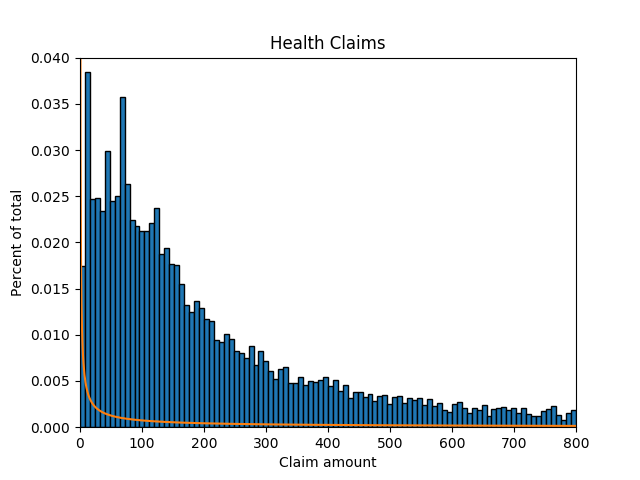

In [39]:
%matplotlib notebook
m = claims.shape[0]
n = smallclaims.shape[0]
weights = (1 / m) * np.ones((n,))
plt.hist(smallclaims, 100, weights=weights, 
         edgecolor='black')

grid = np.linspace(0.001, 800, 1000)
plt.plot(grid, GG_pdf(grid, alpha_GG, beta_GG, m_GG))

plt.title('Health Claims')
plt.xlabel('Claim amount')
plt.ylabel('Percent of total')
plt.xlim(0, 800)  
plt.ylim(0, 0.04)
plt.show()

### (d)

The PDF of the generalized beta 2 distribution is the following.

$$ \text{(GB2):}\quad f(x;a,b,p,q) = \frac{a x^{ap-1}}{b^{ap}B(p,q)\left(1 + \left(\frac{x}{b}\right)^a\right)^{p+q}},\quad x\in[0,\infty), \:a,b,p,q>0 $$
$$ \quad\text{where}\quad B(v,w)\equiv\int_0^1 t^{v-1}(1-t)^{w-1}dt $$

The beta function $B(\cdot,\cdot)$ within the GB2 distribution is a common function that has a preprogrammed function in most programming languages.

In [96]:
# pdf of the GB2 distribution (model)

from scipy.special import beta

def GB2_pdf(xvals, a, b, p, q):
    nom = (a * (xvals**(a * p - 1)))
    denom = (b**(a * p) * beta(p, q)*((1 + (xvals/b)**a)**(p + q)))
    pdf_vals = nom/denom
    return pdf_vals

#print(GB2_pdf(1,1,1,1,1))
#print(GB2_pdf(claims[0],alpha_GG, beta_GG*10000**(1/m_GG), m_GG, q_0))
def gb2pdf(x ,a, b, p, q):
    return (a*(x**(a*p-1)))/(b**(a*p) * beta(p,q)*((1+(x/b)**a)**(p+q)))

# Define log likelihood function for the GB2 distribution
def log_lik_GB2(xvals, a, b, p, q):
  
    pdf_vals = GB2_pdf(xvals,  a, b, p, q)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

q_0 = 10000
a_0 = m_GG
b_0 = beta_GG*10000**(1/m_GG)
p_0 = alpha_GG/beta_GG
 

print('Log-likelihood 1: ', log_lik_GB2(claims, a_0, b_0, p_0, q_0))



Log-likelihood 1:  -177973.47805657634


In [46]:
def critGB2(params, args):
    a, b, p, q = params
    xvals = args
    log_lik_val = log_lik_GB2(xvals, a, b, p, q)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

In [98]:
params_init = np.array([a_0, b_0, p_0, q_0]) 

results = opt.minimize(critGB2, params_init,
                       args = claims, method ='L-BFGS-B',
                       bounds= ((1e-4, None), (1e-4, None),
                                (1e-4, None), (1e-4, None)))
a_GB2, b_GB2, m_GB2, q_GB2 = results.x
print(results)

      fun: 76461.48408624146
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 64.818596  ,   0.        ,   6.625487  ,   1.06520019])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 150
      nit: 15
   status: 0
  success: True
        x: array([  6.99501570e-01,   2.23939970e+08,   9.95711767e-01,
         9.99999959e+03])


<IPython.core.display.Javascript object>


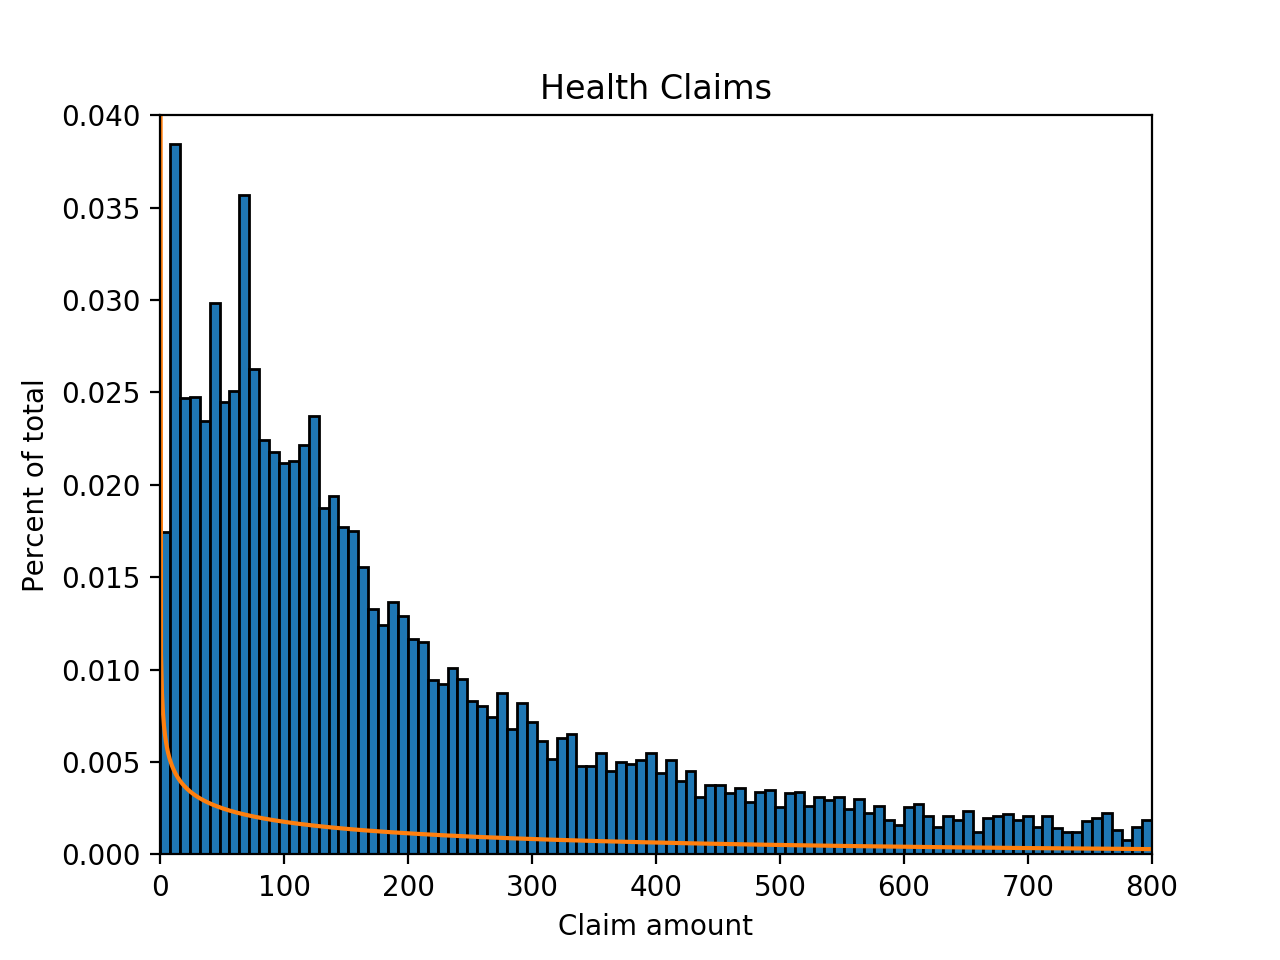

In [100]:
%matplotlib notebook
m = claims.shape[0]
n = smallclaims.shape[0]
weights = (1 / m) * np.ones((n,)) 
plt.hist(smallclaims, 100, weights=weights,
         edgecolor='black')
grid = np.linspace(0.001, 800, 1000)
plt.plot(grid, GB2_pdf(grid, a_GB2, b_GB2, p_GB2, q_GB2))
plt.title('Health Claims')
plt.xlabel('Claim amount')
plt.ylabel('Percent of total')
plt.xlim(0, 800)
plt.ylim(0, 0.04)
plt.show()

### (e)

In [ ]:
import scipy.stats as sts
    
GAlog_lik = log_lik_GA(claims, alpha_GA, beta_GA)
GGlog_lik = log_lik_GG(claims, alpha_GG, beta_GG, m_GG)
GB2log_lik = log_lik_GB2(claims, a_GB2, b_GB2, p_GB2, q_GB2)

GA_chi = abs(2 * (GAlog_lik - GB2log_lik)) 
GG_chi = abs(2 * (GGlog_lik - GB2log_lik))

pval_GA = 1.0 - sts.chi2.cdf(GA_chi, 4) 
pval_GG = 1.0 - sts.chi2.cdf(GA_chi, 4)

print('P-value, H0 = GA: ', pval_GA)
print('P-value, H0 = GG: ', pval_GG)

This indicates we can reject in favor of the more general distribution.

### (f)

In [107]:
from scipy import integrate
prob_GB2_1000 = integrate.quad(GB2_pdf,1000, 2300000
                               ,args = (a_GB2, b_GB2, p_GB2, q_GB2))
                                                              
prob_GA_1000 = integrate.quad(GA_pdf, 1000, 2300000,
                              args = (alpha_GA, beta_GA))
print("Probability_GB2 of healthcare claim exceeding $USD 1000: ", prob_GB2_1000[0])
print("Probability_GA of healthcare claim exceeding $USD 1000: ",
      prob_GA_1000[0])

Probability_GB2 of healthcare claim exceeding $USD 1000:  0.16265775393732365
Probability_GA of healthcare claim exceeding $USD 1000:  0.4519640955975781


As we can see the probability is nearly three times as large for the GA distribution